In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (15,10)

# Задача про датчики на руках

Загружаем метки классов

In [ ]:
sign_classes = pd.read_csv('https://raw.githubusercontent.com/vadim0912/ML2023/master/lecture06/data/sign_classes.csv', index_col=0, header=0, names=['id', 'target'])

Загружаем признаки

In [ ]:
!mkdir ./data
!wget 'https://www.dropbox.com/s/3aiivwb28gdoxj8/tsfresh_features_filt.csv.gz?dl=0' -O ./data/tsfresh_features_filt.csv.gz
filepath = './data/tsfresh_features_filt.csv.gz'
sign_features_filtered = pd.read_csv(filepath)

--2023-04-29 08:22:04--  https://www.dropbox.com/s/3aiivwb28gdoxj8/tsfresh_features_filt.csv.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3aiivwb28gdoxj8/tsfresh_features_filt.csv.gz [following]
--2023-04-29 08:22:04--  https://www.dropbox.com/s/raw/3aiivwb28gdoxj8/tsfresh_features_filt.csv.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e1b743980f400deb9d1dd5786.dl.dropboxusercontent.com/cd/0/inline/B7EnNd6lHlEF-ko48w1KqLkB80bKnplMO2cqeLd7VK8RR_Mw2U6D-jeihHe2LImdkotYaWwSbVgZLgPU79lkU3F43Tp8-3EmgDipxUvld3d1eG3Ii5G89clOxET7VgJCJmu0oHyyWpZsb2BaSQlXdywDYTwQvl4k6_R_eeUtZSJR5g/file# [following]
--2023-04-29 08:22:04--  https://uc6e1b743980f400deb9d1dd5786.dl.dropboxusercontent.com/cd/0/inline/B7EnNd6lHlEF-ko48w1KqLkB80b

In [ ]:
sign_features_filtered.shape

(2565, 11452)

In [ ]:
sign_features_filtered.head()

,id,ring_r__absolute_maximum,ring_r__maximum,ring_r__mean_n_absolute_max__number_of_maxima_7,"ring_r__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","ring_r__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","ring_r__fft_coefficient__attr_""abs""__coeff_2","ring_r__linear_trend__attr_""stderr""",ring_r__quantile__q_0.9,"ring_r__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""",...,"middle_l__fft_coefficient__attr_""angle""__coeff_48","middle_l__fft_coefficient__attr_""angle""__coeff_49","middle_l__fft_coefficient__attr_""angle""__coeff_50","middle_r__fft_coefficient__attr_""real""__coeff_34","middle_r__fft_coefficient__attr_""real""__coeff_35","middle_r__fft_coefficient__attr_""real""__coeff_36","middle_r__fft_coefficient__attr_""real""__coeff_37","middle_r__fft_coefficient__attr_""real""__coeff_38","middle_r__fft_coefficient__attr_""real""__coeff_40","middle_r__fft_coefficient__attr_""real""__coeff_43"
0,0,0.014764,0.014764,0.010414,0.998626,0.000174,0.047854,0.000034,0.006166,0.000423,...,0.0,113.688081,117.543722,0.075507,0.076256,0.064602,0.103978,0.0884,0.063342,0.095416
1,1,0.017579,0.017579,0.008633,0.017579,0.000180,0.045183,0.000027,0.003599,0.000397,...,0.0,113.688081,117.543722,0.075507,0.076256,0.064602,0.103978,0.0884,0.063342,0.095416
2,2,0.043917,0.043917,0.033783,0.043917,0.000737,0.059952,0.000092,0.028252,0.001034,...,0.0,113.688081,117.543722,0.075507,0.076256,0.064602,0.103978,0.0884,0.063342,0.095416
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,113.688081,117.543722,0.075507,0.076256,0.064602,0.103978,0.0884,0.063342,0.095416
4,4,0.061037,0.061037,0.053199,0.061037,0.001453,0.402618,0.000127,0.047034,0.001777,...,0.0,113.688081,117.543722,0.075507,0.076256,0.064602,0.103978,0.0884,0.063342,0.095416


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Подготовим данные на вход в модель

In [ ]:
# признаки
X = sign_features_filtered.values

# классы
y = sign_classes.target.values

In [ ]:
# Будем делать кросс-валидацию на 5 фолдов
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')

In [ ]:
base_cv_scores.mean()

0.9200779727095517

## Метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

Пункт 1. Добавим метод главных компонент в pipeline

In [ ]:
# Будем делать кросс-валидацию на 5 фолдов
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(svd_solver = "randomized", random_state=123)),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')

In [ ]:
base_cv_scores.mean()

0.9200779727095517

Пункт 2. Найти количество главных компонент, при которых score > 0.9, если считать что score не убывает при увеличении числа компонент. Можно использовать бинарный поиск

Сначала один раз находим собственные вектора и собственные числа ковариационной матрицы

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(svd_solver = 'full', random_state=123)
pca.fit(X_scaled)
X_red = np.dot(X_scaled,pca.components_.T) # новая матрица признаков, после перехода к новым осям

Функция скора, зависящая от выбранного количества компонент n

In [ ]:
def get_score(n):
  return cross_val_score(KNeighborsClassifier(n_neighbors=9), X_red[:,0:n], y, cv=cv, scoring='accuracy').mean()

Бинарный поиск

In [ ]:
left, right = 0, min(X.shape)
while left < right:
    i = left + (right - left) // 2
    if get_score(i) > 0.9:
        right = i
    else:
        left = i + 1

Скор

In [ ]:
get_score(left)

0.9001949317738791

Число компонент

In [ ]:
left

69

Пункт 3. Доля объясненной дисперсии

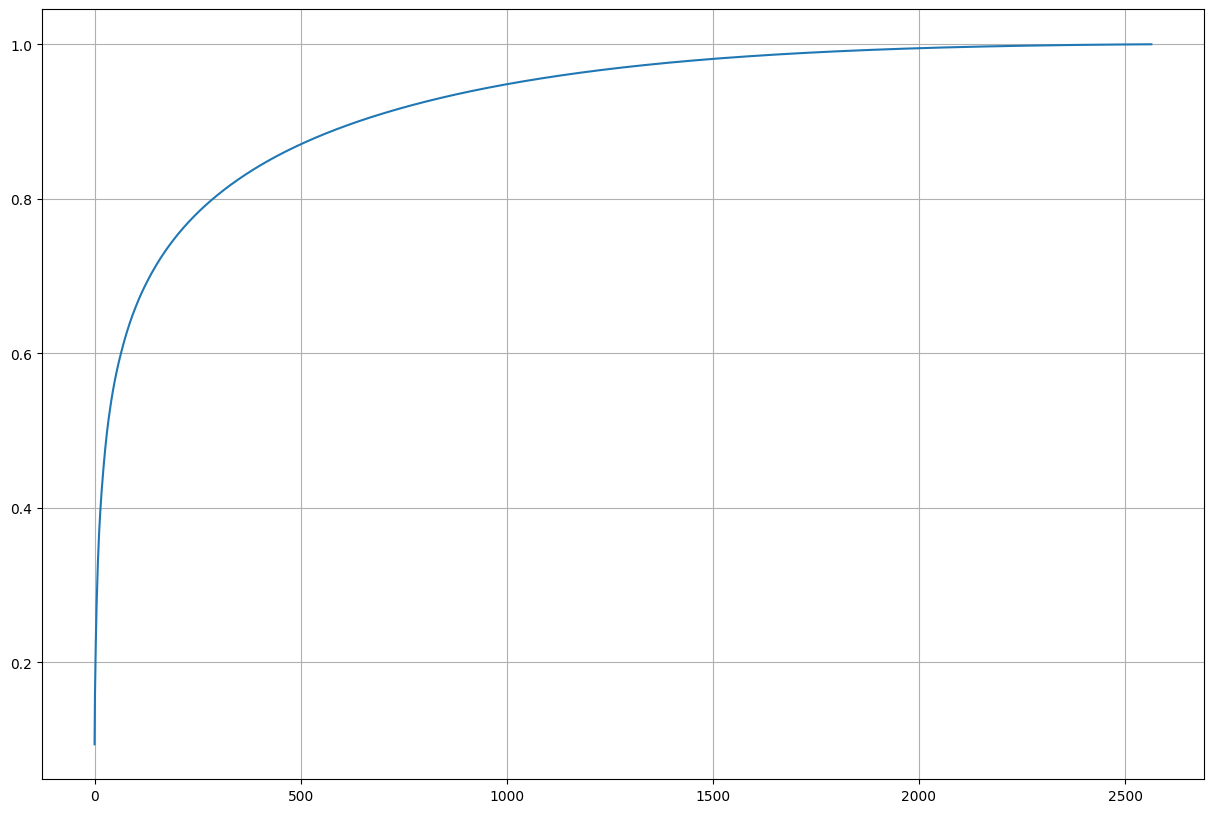

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid(True)

Для выбранного числа компонент

In [ ]:
pca.explained_variance_ratio_.cumsum()[left - 1]

0.6082337971148074

# Задача про кластеризацию текстов

In [ ]:
df_origin = pd.read_csv('https://raw.githubusercontent.com/vadim0912/ML2023/master/lecture06/data/news.csv')
df_origin.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


In [ ]:
df_origin.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Проишествия  РФ                                  100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [ ]:
df = df_origin.copy(deep = True)

In [ ]:
df.text[0] # Так выглядит первая статья до преобработки

' В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИСААКИЕВСКОГО СОБОРА РПЦ В Санкт-Петербурге люди устроили акцию протеста против передачи Исаакиевского собора в безвозмездное пользование РПЦ. Жители Петербурга собрались на Исаакиевской площади, чтобы высказаться против передачи Исаакиевского собора в безвозмездное пользование РПЦ, передает ТАСС. Акция проходит в формате встречи с депутатами Законодательного собрания города и не требует согласования с властями. Участники акции не используют какую-либо символику и плакаты, а также мегафоны или средства звукоусиления. По словам депутата Алексея Ковалева, на Исаакиевскую площадь пришло примерно тысяча человек. Перед участниками протеста выступили депутаты местного парламента Борис Вишневский и Максим Резник, которые заявили о том, что потребуют отмены решения Смольного. Вишневский сообщил, что акция будет проходить в виде встречи депутатов с избирателями. "Закон Санкт-Петербурга предоставляет нам право встречаться с избирателями, такую встречу

In [ ]:
import re

# Оставляем только кириллические символы
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Удаляем стоп-слова
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""

df.text = df.text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install pymystem3
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-05-31 06:06:40--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.242, 5.45.205.243, 5.45.205.244, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.242|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cachev2-m9-6.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235 [following]
--2023-05-31 06:06:41--  http://cachev2-m9-6.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235
Resolving cachev2-m9-6.cdn.yandex.net (cachev2-m9-6.cdn.yandex.net)... 37.9.111.35, 2a02:6b8:c35::562:0:9
Connecting to cachev2-m9-6.cdn.yandex.net (cachev2-m9-6.cdn.yandex.net)|37.9.111.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application

In [ ]:
%%time
from pymystem3 import Mystem


# нормализуем текст
bin_path = "./mystem"
m = Mystem(bin_path)
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()
    except:
        return " "

df.text = df.text.apply(lemmatize)

CPU times: user 5.77 ms, sys: 0 ns, total: 5.77 ms
Wall time: 6.34 ms


In [ ]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']

# Еще кое-что удаляем
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)

In [ ]:
df.text[0] # так выгладит первая статья после предобработки

''

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [ ]:
vect = TfidfVectorizer()
texts = df.text.values

In [ ]:
X = vect.fit_transform(texts)

ValueError: ignored

In [ ]:
S = pairwise_distances(X,X,metric='cosine')

NameError: ignored

[[Text(0.5, 0, ''),
  Text(44.5, 0, ''),
  Text(88.5, 0, ''),
  Text(132.5, 0, ''),
  Text(176.5, 0, ''),
  Text(220.5, 0, ''),
  Text(264.5, 0, ''),
  Text(308.5, 0, ''),
  Text(352.5, 0, ''),
  Text(396.5, 0, ''),
  Text(440.5, 0, ''),
  Text(484.5, 0, ''),
  Text(528.5, 0, ''),
  Text(572.5, 0, ''),
  Text(616.5, 0, ''),
  Text(660.5, 0, ''),
  Text(704.5, 0, ''),
  Text(748.5, 0, ''),
  Text(792.5, 0, ''),
  Text(836.5, 0, ''),
  Text(880.5, 0, ''),
  Text(924.5, 0, ''),
  Text(968.5, 0, ''),
  Text(1012.5, 0, ''),
  Text(1056.5, 0, ''),
  Text(1100.5, 0, ''),
  Text(1144.5, 0, ''),
  Text(1188.5, 0, ''),
  Text(1232.5, 0, ''),
  Text(1276.5, 0, ''),
  Text(1320.5, 0, ''),
  Text(1364.5, 0, ''),
  Text(1408.5, 0, ''),
  Text(1452.5, 0, ''),
  Text(1496.5, 0, ''),
  Text(1540.5, 0, ''),
  Text(1584.5, 0, ''),
  Text(1628.5, 0, ''),
  Text(1672.5, 0, ''),
  Text(1716.5, 0, ''),
  Text(1760.5, 0, ''),
  Text(1804.5, 0, ''),
  Text(1848.5, 0, ''),
  Text(1892.5, 0, '')],
 [Text(0, 0.5,

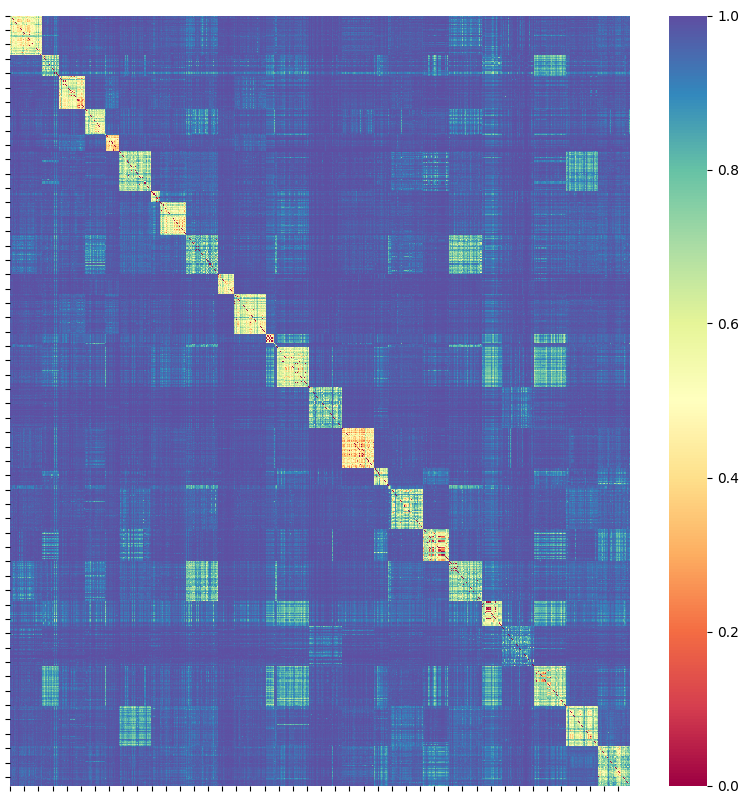

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data=S, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

For n_clusters = 4 The average silhouette_score is : 0.04693568529326242
For n_clusters = 8 The average silhouette_score is : 0.08810609280223154
For n_clusters = 11 The average silhouette_score is : 0.1059276752494533
For n_clusters = 12 The average silhouette_score is : 0.12025216277324785
For n_clusters = 16 The average silhouette_score is : 0.1439775433253863
For n_clusters = 32 The average silhouette_score is : 0.14065274683204348


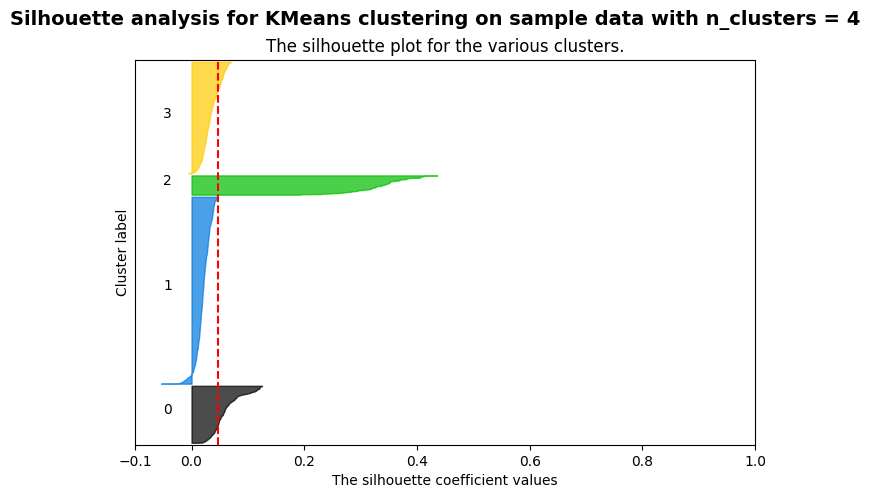

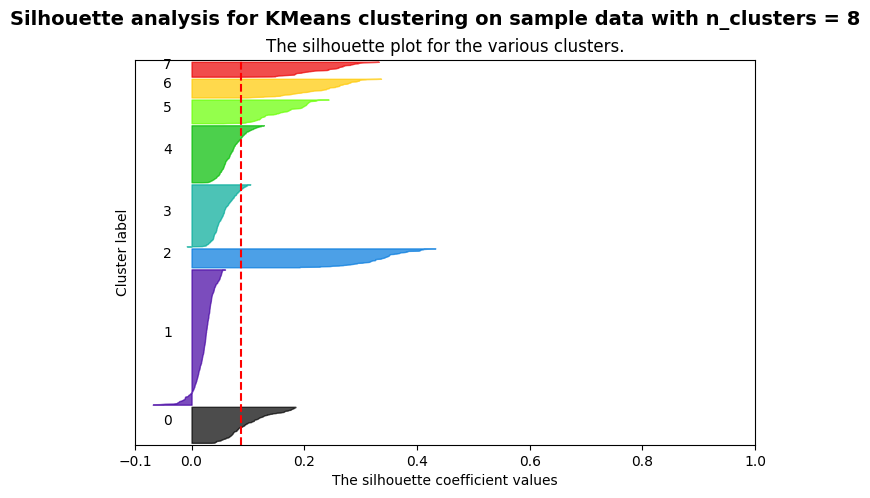

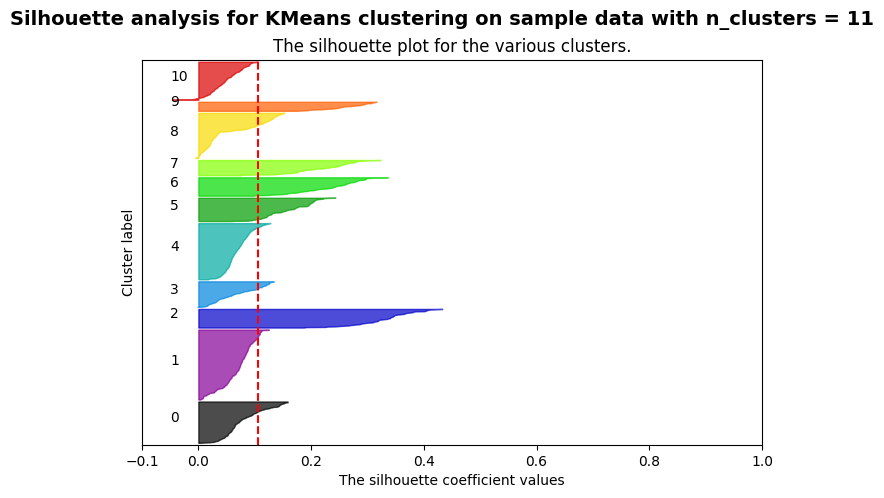

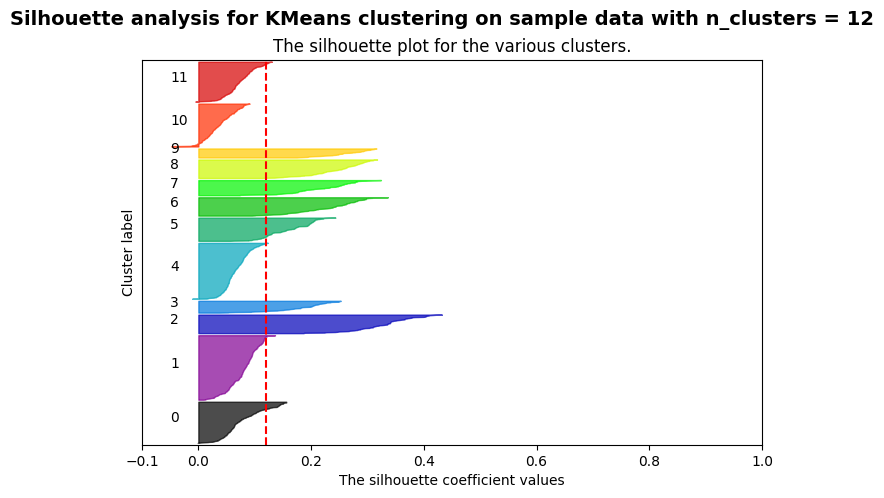

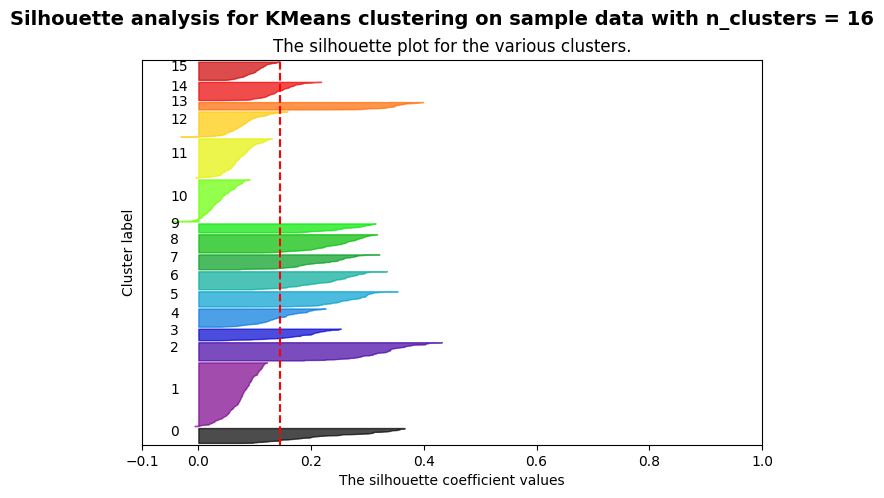

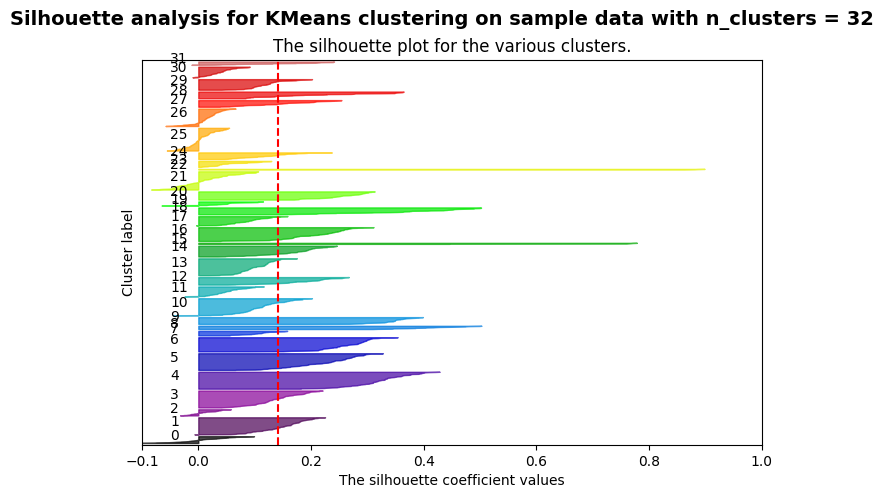

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [4, 8,11,12, 16, 32]


for n_clusters in range_n_clusters:

    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot()

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

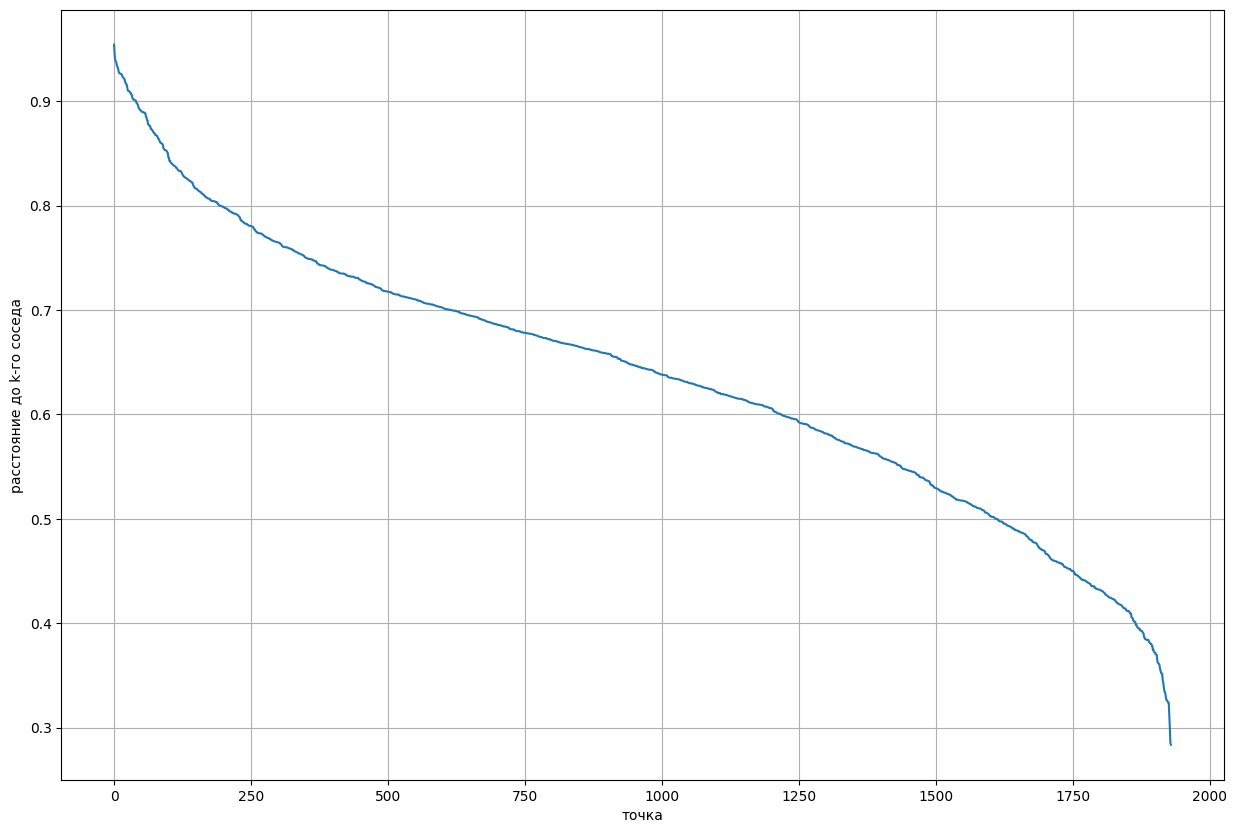

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine')
model.fit(X)
neighbors = model.kneighbors(X, 38)
rho = neighbors[0][:,-1]
rho[::-1].sort()
plt.plot(rho)
plt.xlabel('точка')
plt.ylabel('расстояние до k-го соседа')
plt.grid(True)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

dbscan = DBSCAN(metric = 'cosine', eps = 0.6687, min_samples = 38).fit(X)
labels = dbscan.labels_
metrics.adjusted_rand_score(labels, df['class'])

0.4716121638626312

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

новости РПЦ

In [ ]:
print(df_origin.text[labels == 0].values[::20])

[' В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИСААКИЕВСКОГО СОБОРА РПЦ В Санкт-Петербурге люди устроили акцию протеста против передачи Исаакиевского собора в безвозмездное пользование РПЦ. Жители Петербурга собрались на Исаакиевской площади, чтобы высказаться против передачи Исаакиевского собора в безвозмездное пользование РПЦ, передает ТАСС. Акция проходит в формате встречи с депутатами Законодательного собрания города и не требует согласования с властями. Участники акции не используют какую-либо символику и плакаты, а также мегафоны или средства звукоусиления. По словам депутата Алексея Ковалева, на Исаакиевскую площадь пришло примерно тысяча человек. Перед участниками протеста выступили депутаты местного парламента Борис Вишневский и Максим Резник, которые заявили о том, что потребуют отмены решения Смольного. Вишневский сообщил, что акция будет проходить в виде встречи депутатов с избирателями. "Закон Санкт-Петербурга предоставляет нам право встречаться с избирателями, такую встреч

Внешняя политика

In [ ]:
print(df_origin.text[labels == 1].values[::20])

[' ИНАУГУРАЦИЯ 45-ГО ПРЕЗИДЕНТА США ДОНАЛЬДА ТРАМПА В полдень 20 января (20:00 мск) миллиардер Трамп стал хозяином Белого дома, сменив на этом посту Барака Обаму Ранним утром 20 января 2017 года здание Капитолия в Вашингтоне было готово к инаугурации нового президента США. Традиция проводить церемонию в западном крыле Капитолия ведется с 20 января 1981 года, когда на пост президента США заступил Рональд Рейган. Мормонский табернакальный хор, существующий с 1973 года, не впервые принял участие в церемонии инаугурации президента США. Хор пел во время вступления в должность главы Белого дома Линдона Джонсона в 1965 году, Ричарда Никсона - в 1969-м, Рональда Рейгана - в 1981-м и Джорджа Буша-старшего (в 1989 году) и Джорджа Буша-младшего (в 2001-м). Действующий президент США Барак Обама и его жена Мишель у входа в Белый дом ожидают избранного президента Дональда Трампа с супругой Меланией на традиционное чаепитие. Через полтора часа Обама передаст Трампу полномочия главы государства, котор

Протесты

In [ ]:
print(df_origin.text[labels == 7].values[::20])

[' РАЗВИЛКА ДЛЯ КРЕМЛЯ: КАК РЕАГИРОВАТЬ НА ПРОТЕСТЫ По всей России в воскресенье прошли антикоррупционные митинги, ставшие самыми массовыми со времен протестных акций 2011-2012 годов, самые крупные - в Москве, Санкт-Петербурге, Новосибирске, Екатеринбурге, Челябинске, Владивостоке. Точное число задержанных неизвестно. Однако только в столице, по данным общественной организации ОВД-Инфо, их число перевалило за 1,3 тыс. человек, что почти вдвое выше, чем во время акции протеста 6 мая 2013 г. на Болотной площади, обернувшейся столкновениями с полицией. Впоследствии несколько десятков человек были осуждены, сам процесс получил в России название "Болотное дело". Русская служба Би-Би-си разбиралась, стала ли акция и ее резонанс неожиданными для Кремля и к каким последствиям в политике, законодательстве, а также правовым последствиям для задержанных она может привести. Отложенная реакция Кремля То, что митинги против коррупции приобрели массовый характер, стало понятно еще до начала акции в ц

Теракты

In [ ]:
print(df_origin.text[labels == 5].values[::20])

[' СМИ ОШИБОЧНО НАЗВАЛИ ИСПОЛНИТЕЛЯ ТЕРАКТА В ЛОНДОНЕ Как сообщал ранее "ФедералПресс", 22 марта автомобиль въехал в толпу прохожих на Вестминстерском мосту в Лондоне. После этого автомобиль врезался в здание около британского парламента. Затем один террорист напал на прохожих с ножом, и был застрелен полицией. ФедералПресс https://news.yandex.ru/yandsearch?lr=213&cl4url=fedpress.ru%2Fnews%2Fnorthern-europe%2Fincidents%2F1760767&lang=ru&rubric=world&from=rubric'
 ' 1 Канал (1tv.ru), Москва, 23 марта 2017 ОТВЕТСТВЕННОСТЬ ЗА ТЕРАКТ В ЛОНДОНЕ ВЗЯЛА НА СЕБЯ ЗАПРЕЩЕННАЯ ГРУППИРОВКА ИГИЛ Идет расследование вчерашней атаки в Лондоне. В разных городах Великобритании обыски и задержания. Погибших, по последним данным, трое, раненых - десятки, граждане разных стран. Ответственность взяла на себя запрещенная группировка ИГИЛ. О том, что для противостояния террористической угрозе требуется объединение усилий всего мирового сообщества, заявил Владимир Путин. Он направил телеграмму со словами соболе

Отдых

In [ ]:
print(df_origin.text[labels == 11].values[::20])

[' ТУРИСТЫ СКИНУТСЯ ПО 100 РУБЛЕЙ ЗА КРЫМ Автор: Фаляхов Рустем По 100 рублей в сутки смогут взимать власти с туристов в Крыму, Алтайском, Краснодарском и Ставропольском краях. Соответствующий законопроект внесен в Госдуму и имеет все шансы на принятие. Сами туристы называют этот сбор "налогом на воздух". Правительство решило устроить эксперимент над туристами. В Госдуму внесен законопроект о проведении эксперимента по развитию курортной инфраструктуры. "Предусматривается проведение с 1 января 2018 года по 31 декабря 2022 года включительно эксперимента по введению платы за пользование курортной инфраструктурой (курортный сбор) в Республике Крым, Алтайском, Краснодарском и Ставропольском краях", - говорится в тексте законопроекта. Под курортной инфраструктурой понимается "совокупность объектов лечебно-оздоровительного, социально-культурного, физкультурно-спортивного и рекреационного назначения, расположенных на территории". Иными словами, новый налог вводится на главных курортах страны.

Выборы в России

In [ ]:
print(df_origin.text[labels == 14].values[::20])

[' ВЫБОРЫ БЕЗ СЮРПРИЗОВ Эксперты назвали явку в единый день голосования естественной В России в единый день голосования прошли выборы в 82 субъектах: граждане выбирали высших должностных лиц в 16 регионах, депутатов региональных парламентов и представительных органов муниципальных образований. Традиционно на своем участке в Гагаринском районе Москвы проголосовал президент России Владимир Путин. Глава государства сказал, что из-за плотного графика не смог внимательно следить за ходом кампании, однако изучил биографию всех кандидатов на муниципальных выборах и сделал "осознанный выбор". Эксперты указывают, что на этих выборах не отмечено стремления властей искусственно продемонстрировать высокую активность избирателей, снизилось "административное давление" и явка была "естественной". По предварительным данным, в регионах, где прошли выборы глав субъектов, победу в первом туре одержали действующие руководители. Председатель Центризбиркома России Элла Памфилова заявила по итогам единого дн

Космос

In [ ]:
print(df_origin.text[labels == 8].values[::10])

[' РОГОЗИН ПОЗДРАВИЛ ИЛОНА МАСКА С УДАЧНЫМ ЗАПУСКОМ РАКЕТЫ FALCON 9 Вице-премьер РФ Дмитрий Рогозин поздравил основоположника компании Space X Илона Маска с первым удачным повторным запуском ракеты Falcon 9. "Мы сердечно поздравляем Илона Маска", - объявил Рогозин на совещании экспертного совета военно-промышленной комиссии Российской Федерации по стратегии развития "Роскосмоса" до 2030 г. Об этом он проинформировал в процессе выступления на совещании экспертного совета председателя Коллегии ВПК, передает. Как говорилось, 30 марта SpaceХ, основанная и возглавляемая Илоном Маском, в первый раз в истории произвела повторный запуск ракеты-носителя. "Мы его все сердечно поздравляем, это очень привлекательная технология", - информирует его слова avtoinsider.com. Он добавил, что у "Роскосмоса" "несколько иные взгляды на эту тему", однако опыт использования многоразовых ракет "надо обсуждать". Первая ступень ракеты-носителя Falcon 9, которая была повторно применена для запуска в ночь на 31 ма

In [ ]:
pd.crosstab(df.loc[:, 'class'], labels)

col_0,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
class,,,,,,,,,,,,,,,,
Важные мировые события,10,0,225,84,0,41,0,0,0,0,0,0,0,43,0,0
Внутренняя политика РФ,5,100,62,0,0,0,0,0,0,0,0,0,100,0,0,97
Внутренняя политика РФ: оппозиция,53,0,1,0,62,0,0,0,161,0,0,0,0,0,0,0
Внутренняя политика: культура,1,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0
Международные отношения,47,0,106,0,0,0,0,0,0,0,0,0,0,0,0,0
Международные отношения: Криминальная хроника,0,0,0,0,0,0,0,82,0,0,0,0,0,0,0,0
Проишествия РФ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0
Спорт,99,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Спорт,20,0,0,0,0,0,0,0,0,0,0,82,0,0,0,0
